<a href="https://colab.research.google.com/github/CzarNoel/Analise-Suicidio-2014-2018-Datasus-/blob/main/An%C3%A1lise_Suicidio_Set_Amarelo_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Suicídio Brasil de 2014 à 2018

### Dados coletados pelo [DATASUS](https://datasus.saude.gov.br/)

###### O arquivo é composto por *45036* entradas de dados, portanto, mais de quarenta e cinco mil casos de suicídio.

Os dados a seguir tem como propósito instigar novos tópicos geradadores para o mês do **Setembro Amarelo**.

Trazendo a Psicologia Social e a Psicologia como um todo, como ótica para debates a partir do tópicos gerados na visualização dos dados.

Este documento é gerado por um programa chamado **Jupyter Notebook** e linguagem de programação chamado **Python** (ambos softwares abertos - OpenSource) e outras bibliotecas como *Pandas*, *Matplotlib* e *Seaborn*, para exploração e plotagem gráfica.

---
Por ***Leonardo Zara***

Psicologia [Unicuritiba](https://www.unicuritiba.edu.br/) - Setembro 2023

---
Contato:

[*Instagram*](https://www.instagram.com/leonardo.zara/)

[*Email*](zara.leonardo@gmail.com)


In [57]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [8]:
#Importando os dados e chamando "enconding" para evitar Unicodeerror
data = pd.read_csv('/data_suicidio.csv', encoding='latin9')
#Mostrando os primeiros dados do arquivo
data.head()

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,MG,2017,NaN,18-02-17,06-06-89,Feminino,Parda,Vi?vo,8 a 11 anos,ABATEDOR,Par? de Minas,Outro estabelecimento de sa?de,Sim,X700,X700,28.0,2
1,MG,2017,Suic?dio,15-02-17,23-12-98,Masculino,Parda,Solteiro,8 a 11 anos,ABATEDOR,Abaet?,Domic?lio,Sim,X700,X700,19.0,2
2,RS,2014,Suic?dio,27-11-14,01-09-65,Masculino,Branca,Solteiro,NaN,ACABADOR DE CALCADOS,Tr?s Coroas,Hospital,N?o,X700,X700,49.0,11
3,RS,2015,Suic?dio,03-05-15,14-07-71,Feminino,Branca,NaN,4 a 7 anos,ACABADOR DE CALCADOS,Tr?s Coroas,Domic?lio,N?o,X700,X700,44.0,5
4,MG,2016,Suic?dio,30-03-16,10-04-89,Masculino,Parda,Solteiro,8 a 11 anos,ACABADOR DE CALCADOS,Nova Serrana,Hospital,Sim,X680,X680,27.0,3


---
# **Ocupação e Suicídio**

##### A contagem de suicídios se mostra alta para os seguintes cargos de ocupação e situações de emprego/desemprego:

- Aposentados e Pensionistas
- Estudantes
- Donda de Casa
- Trabalhador Agropecuária em Geral
- Trabalhador Volante de Agricultura
- Pedreiro
- Desemprego Crônico
- Empregado(a) doméstica nos Serviços Gerais

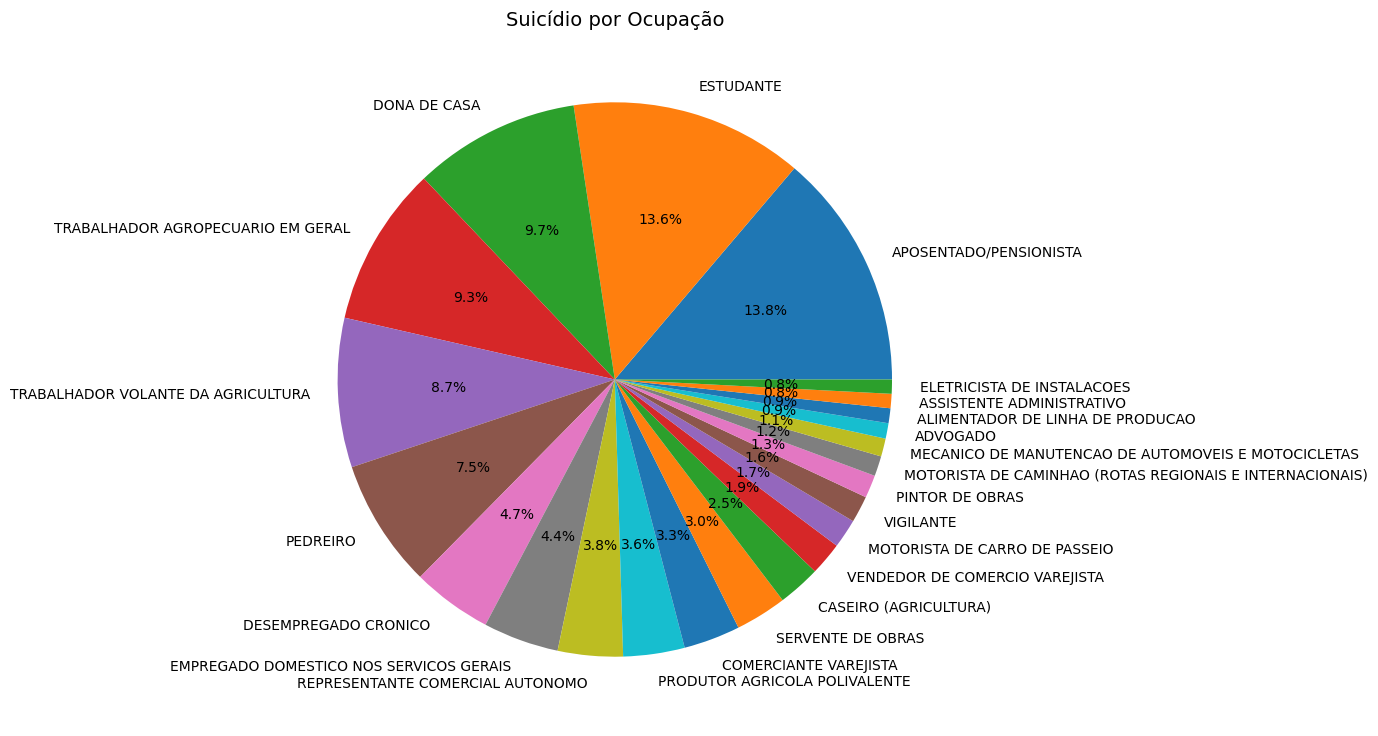

In [44]:
# Código de construção do gráfico
ocup_total = data['OCUP'].value_counts()

# Filtrar ocupacões com número de suicídios menor que 250
ocup_limite = 250
ocup_limite_total = ocup_total[ocup_total >= ocup_limite]

# Gráfico
plt.figure(figsize=(9, 9))
plt.pie(ocup_limite_total, labels=ocup_limite_total.index, autopct='%1.1f%%')
plt.title('Suicídio por Ocupação', size=14)
plt.show()

---


# **Suicídios por estados (UF)**

Os 5 estados (UF) com maior número de casos de suicídios de acordo com os dados são:

- SP
- MG
- RS
- PR
- SC


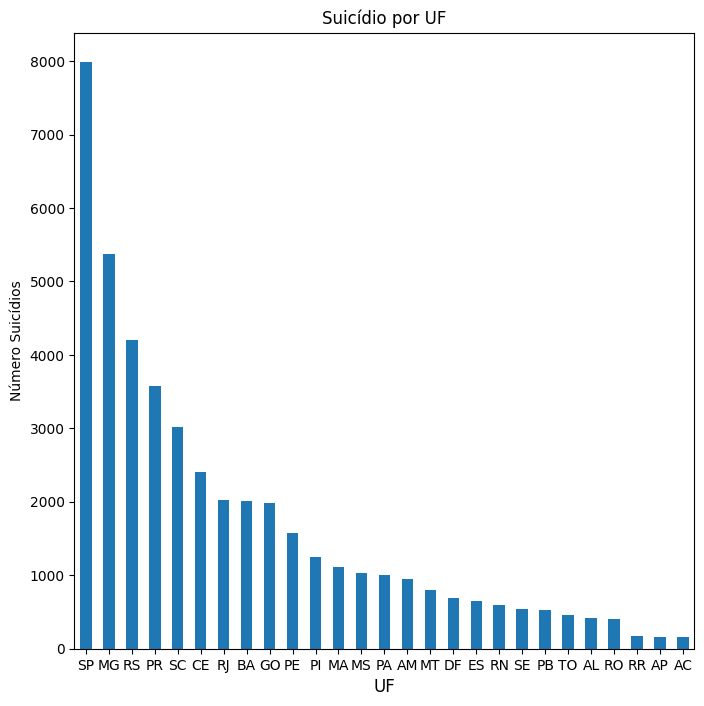

In [39]:
plt.figure(figsize=(8, 8))
data['estado'].value_counts().plot.bar()
plt.title('Suicídio por UF')
plt.xlabel('UF', size=12)
plt.ylabel('Número Suicídios')
plt.xticks(rotation=0)
plt.show()

---


# **Suicídio por Idade**
O maior número de suicídios acontece com sujeitos de **33** anos de idade.
A média do total de número de suicídio, é **43** anos de idade.

In [29]:
# Média de idade
data['idade'].mean()

43.01597706768588

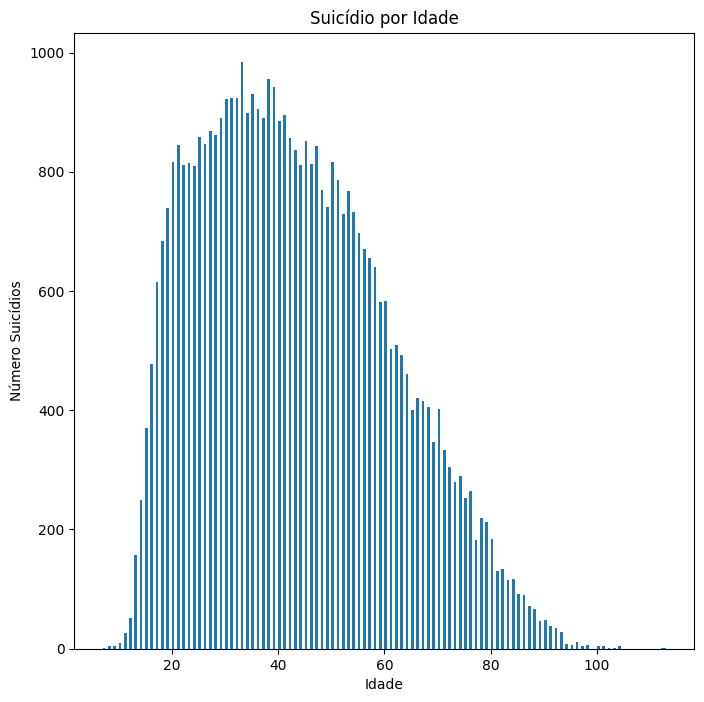

In [24]:
# Gráfico
plt.figure(figsize=(8, 8))
data['idade'].plot.hist(bins=212)
plt.title('Suicídio por Idade')
plt.xlabel('Idade')
plt.ylabel('Número Suicídios')
plt.xticks(rotation=0)
plt.show()

---

# **Suicídio por Etnia**

Considerando os levantamentos do IBGE entre 2012 e 2019, atentaremos a relação de números de suicídio por etnia.

![Imagem Pop. COR](https://educa.ibge.gov.br/images/cor_ou_raca_-_populacao_por_cor_ou_raca.png)



Entretanto, a partir da análise dos dados entre 2014 e 2018, existe uma variação dessas porcentagens, mesmo que próximos.

Verificar as porcentagens logo abaixo do segundo gráfico


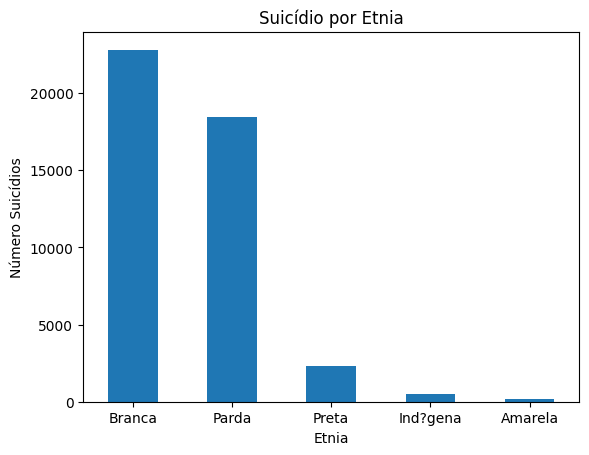

Branca: 50.62%
Parda: 40.93%
Preta: 5.16%
Ind?gena: 1.05%
Amarela: 0.43%


In [28]:
# Gráfico
data['RACACOR'].value_counts().plot.bar()
plt.title('Suicídio por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Número Suicídios')
plt.xticks(rotation=0)
plt.show()

# Calcular total etnias
total_etnia = data['RACACOR'].value_counts()

# Calcular total suicídios
total_suicidio = len(data)

# Calcular porcentagens referente ao total de suicídios por etnia
for race, count in race_counts.items():
    percentage = (count / total_suicides) * 100
    print(f'{race}: {percentage:.2f}%')

---

# **Suicídio por Gênero**

É relevante considerar que as coletas registraram apenas dois tipos de gêneros.

In [45]:
# Verificar quais tipos de gêneros estão cadastrados nos dados do DATASUS
print(data['SEXO'].unique())

['Feminino' 'Masculino']


Observe abaixo do gráfico que o gênero Masculino corresponde a **77,51**% do número total de suicídio, contra **22,49**% do Feminino.

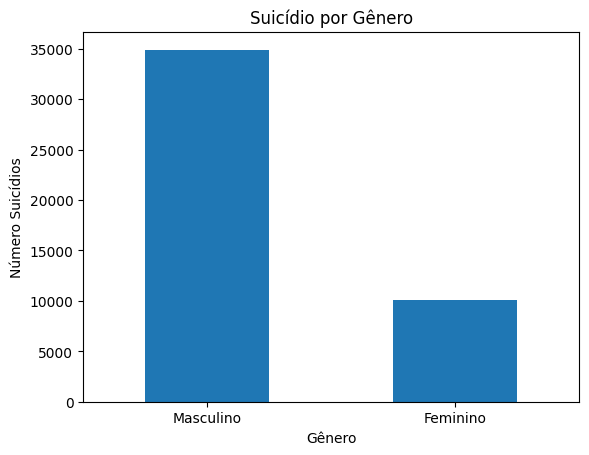

Masculino: 77.51%
Feminino: 22.49%


In [48]:
# Gráfico
data['SEXO'].value_counts().plot.bar()
plt.title('Suicídio por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número Suicídios')
plt.xticks(rotation=0)
plt.show()

# Calcular total etnias
total_sexo = data['SEXO'].value_counts()

# Calcular total suicídios
total_suicidio = len(data)

# Calcular porcentagens referente ao total de suicídios por etnia
for race, count in total_sexo.items():
    percentage = (count / total_suicidio) * 100
    print(f'{race}: {percentage:.2f}%')

---

# Análise Correlacional

In [50]:
print(data.head())

  estado   ano CIRCOBITO   DTOBITO    DTNASC       SEXO RACACOR    ESTCIV  \
0     MG  2017       NaN  18-02-17  06-06-89   Feminino   Parda     Vi?vo   
1     MG  2017  Suic?dio  15-02-17  23-12-98  Masculino   Parda  Solteiro   
2     RS  2014  Suic?dio  27-11-14  01-09-65  Masculino  Branca  Solteiro   
3     RS  2015  Suic?dio  03-05-15  14-07-71   Feminino  Branca       NaN   
4     MG  2016  Suic?dio  30-03-16  10-04-89  Masculino   Parda  Solteiro   

           ESC                  OCUP      CODMUNRES  \
0  8 a 11 anos              ABATEDOR  Par? de Minas   
1  8 a 11 anos              ABATEDOR         Abaet?   
2          NaN  ACABADOR DE CALCADOS    Tr?s Coroas   
3   4 a 7 anos  ACABADOR DE CALCADOS    Tr?s Coroas   
4  8 a 11 anos  ACABADOR DE CALCADOS   Nova Serrana   

                          LOCOCOR ASSISTMED CAUSABAS CAUSABAS_O  idade  mes  
0  Outro estabelecimento de sa?de       Sim     X700       X700   28.0    2  
1                       Domic?lio       Sim     X7

<ipython-input-62-472f60373289>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesse['estado'] = label_encoder.fit_transform(df_interesse['estado'])
<ipython-input-62-472f60373289>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesse['SEXO'] = label_encoder.fit_transform(df_interesse['SEXO'])
<ipython-input-62-472f60373289>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

<function matplotlib.pyplot.show(close=None, block=None)>

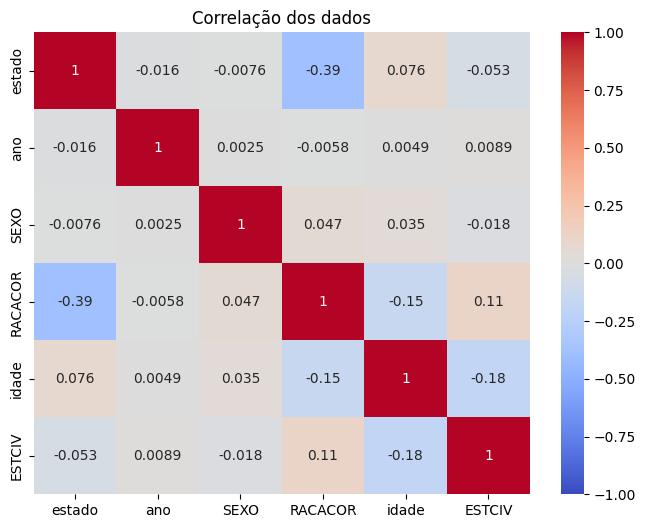

In [62]:
# Definir quais dados para análise correlacional
var_interesse = ['estado', 'ano', 'SEXO', 'RACACOR', 'idade', 'ESTCIV']
df_interesse = data[var_interesse]

# Codificar dados não numeros em numericos
label_encoder = LabelEncoder()
df_interesse['estado'] = label_encoder.fit_transform(df_interesse['estado'])
df_interesse['SEXO'] = label_encoder.fit_transform(df_interesse['SEXO'])
df_interesse['RACACOR'] = label_encoder.fit_transform(df_interesse['RACACOR'])
df_interesse['ESTCIV'] = label_encoder.fit_transform(df_interesse['ESTCIV'])

# Calcular matriz correlacional
matriz_corr = df_interesse.corr()

# Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação dos dados')
plt.show